In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/content/sample_data/cement_slump.csv')

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

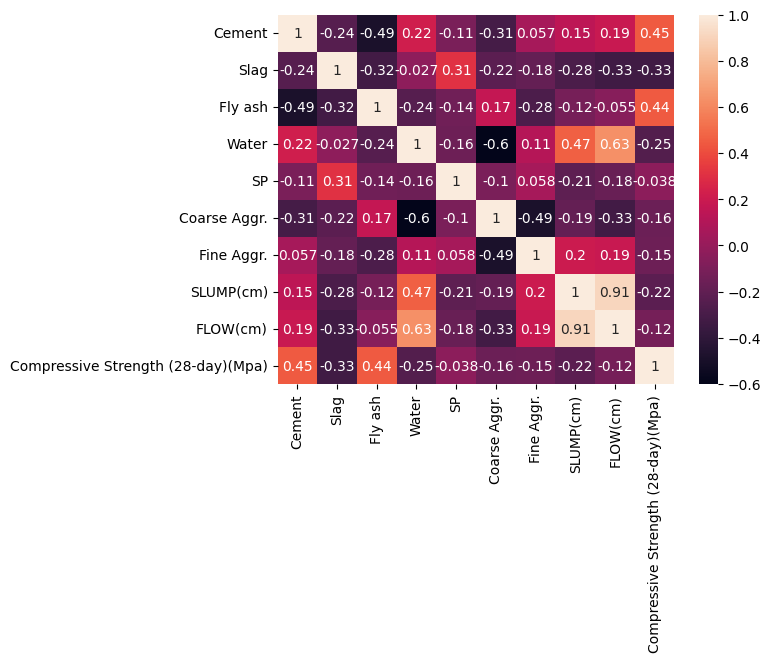

In [5]:
sns.heatmap(data=df.corr(),annot=True)

In [6]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, LinearSVR
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [14]:
model = SVR()
model.fit(X_train_t,y_train)
base_pred = model.predict(X_test_t)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mean_absolute_error(y_test,base_pred)

5.236902091259178

In [18]:
np.sqrt(mean_squared_error(y_test,base_pred))

np.float64(6.695914838327133)

In [19]:
y_test.mean()

np.float64(36.26870967741935)

In [24]:
param_grid = {'C': [0.001,0.01,0.1,0.5, 1],
              'kernel': ['linear', 'rbf','poly'],
              'epsilon':[0.001,0.01,0.1,0.2,0.5,1,2],
              'gamma':['scale','auto'],
              'degree':[2,3,4]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_t, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [26]:
grid_search.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [29]:
mean_absolute_error(y_test,grid_search.predict(X_test_t))

2.5128012210762365

In [28]:
np.sqrt(mean_squared_error(y_test,grid_search.predict(X_test_t)))

np.float64(3.178210305119858)